## 説明
***
コードブロック[1]では，必要なライブラリのインポートを行っている．
コードブロック[2]では，dx・dtの定義を行っている．その後，濃度データを格納する2次元配列のサイズをlenX, lenTで定義し，arr2dの初期化を６行目で行っている．
8行目でt=0の初期条件により求められる値を代入し，9-11行目では
$$
c(x, t+\Delta t)　=　c(x, t) + D\frac{\Delta t}{\Delta x^2}(c(x-\Delta x, t) + c(x+\Delta x, t) - 2c(x, t) )
$$を内包表記で計算している．

コードブロック[3]では，求めた濃度データを格納する2次元配列arr2dをdataframeで確認している．
コードブロック[4]では，t=0, 0.05, 0.1, 0.2, 0.4についてグラフを描画して課題スライドのものと一致っしていることを確認した．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dx = 0.1
dt = 0.002

lenX = int(1/dx) + 1
lenT = int(0.4/dt) + 1
arr2d = np.zeros((lenT, lenX))

arr2d[0, :] = np.array([2*(x*dx) if x*dx <= 0.5 else 2*(1 - x*dx) for x in range(lenX)])
for _ in range(lenT-1):
    i = _ +1
    arr2d[i, 1:lenX-1] = arr2d[i-1, 1:lenX-1] + \
    0.2 * np.array(
        [arr2d[i-1, x-1] + arr2d[i-1, x+1] - 2 * arr2d[i-1, x] for x in range(1, lenX-1)]
    )

In [3]:
df = pd.DataFrame(arr2d)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.200000,0.400000,0.600000,0.800000,1.000000,0.800000,0.600000,0.400000,0.200000,0.0
1,0.0,0.200000,0.400000,0.600000,0.800000,0.920000,0.800000,0.600000,0.400000,0.200000,0.0
2,0.0,0.200000,0.400000,0.600000,0.784000,0.872000,0.784000,0.600000,0.400000,0.200000,0.0
3,0.0,0.200000,0.400000,0.596800,0.764800,0.836800,0.764800,0.596800,0.400000,0.200000,0.0
4,0.0,0.200000,0.399360,0.591040,0.745600,0.808000,0.745600,0.591040,0.399360,0.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.005240,0.009968,0.013719,0.016128,0.016958,0.016128,0.013719,0.009968,0.005240,0.0
197,0.0,0.005138,0.009773,0.013451,0.015812,0.016626,0.015812,0.013451,0.009773,0.005138,0.0
198,0.0,0.005037,0.009581,0.013187,0.015503,0.016301,0.015503,0.013187,0.009581,0.005037,0.0
199,0.0,0.004939,0.009394,0.012929,0.015199,0.015981,0.015199,0.012929,0.009394,0.004939,0.0


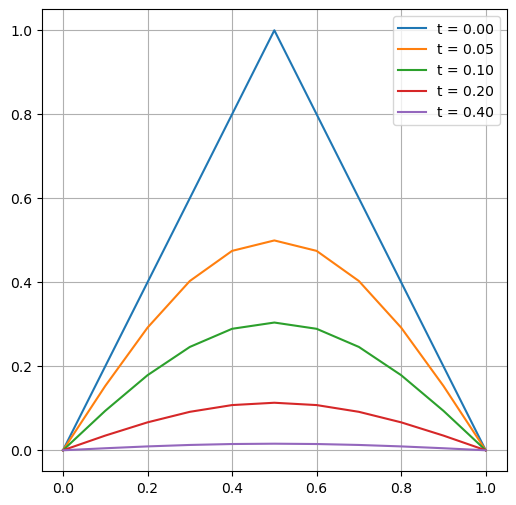

In [4]:
arr_x = np.array([x*dx for x in range(11)])
arr_t = np.array([0, 0.05, 0.1, 0.2, 0.4])
arr_t = (arr_t/dt).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.grid()
for t in arr_t:
    arr_y = np.array(df)[t, :]
    plt.plot(arr_x, arr_y, label = 't = {:.2f}'.format((t*dt)))
plt.legend()
plt.show()